# Analyzing NBA Players Statsitics from 1991 - 2022 

I wanted to work on a topic that I am passionate aboout while I learn and develop python, data analysis, and machine learning skills. This project takes a look into a dataset that has player information from 1991 all the way to 2022. It has information on every player, basic information like height and weight, college (if applies), country, and has average stats per regular season such as points, rebounds, assists, games played and more. The dataset can be found on kaggle: https://www.kaggle.com/datasets/justinas/nba-players-data. The dataset is owned by Justinas Cirtautas and is updated regularly. 

To begin with the project, I needed to import libraries I think I will be using, as well as reading in the dataframe. 

In [3]:
#Importing some libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import io
import tensorflow as tp
from tensorflow import keras

In [4]:
#Reading in dataframe
df = pd.read_csv(('/content/nba_all_seasons.csv'))

#Exploratory Data Analysis:

I wanted to work on my EDA skills so I try to go very in depth here, I know some visualizations are not as important as others but it allows me to see the behavior of the data. 

Looking at some of our data set features:

In [5]:
#Peaking into the data
pd.options.display.max_columns = 50
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [6]:
#Looking at dataframe row and column size
df.shape

(12305, 22)

In [7]:
#Looking at dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [8]:
#Looking at column names
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [9]:
#Looking at statistical summary
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Looking for duplicate values

In [10]:
#Checking for duplicates
df.duplicated().sum()

0

Looking for null values:

In [11]:
#Checking for null values
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

Looking at variable types:

In [12]:
#Checking for variable types
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

I wanted to look at the distributions for our continuous variables:

In [13]:
#Dropping the first column because we dont need it 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
#Plotting histograms of our continuous numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df):
    """
    Plot histograms for each continuous numerical variable in a DataFrame
    
    Parameters:
        - df (pandas DataFrame): The input DataFrame
        
    Returns:
        None
    """
    numerical_cols = df.select_dtypes(include='number') # select all numerical columns
    color_palette = sns.color_palette("Set2") 
    
    for col in numerical_cols.columns: # loop through all numerical columns
        plt.figure(figsize=(8, 6)) 
        sns.histplot(df[col], bins=20, color=color_palette[1]) # plot the histogram 
        plt.xlabel(col) # set the x-axis label
        plt.ylabel('Frequency') # set the y-axis label
        plt.title(f'Distribution of {col}') # set the title
        sns.despine() # remove the spines of the plot
        plt.show() # show the plot

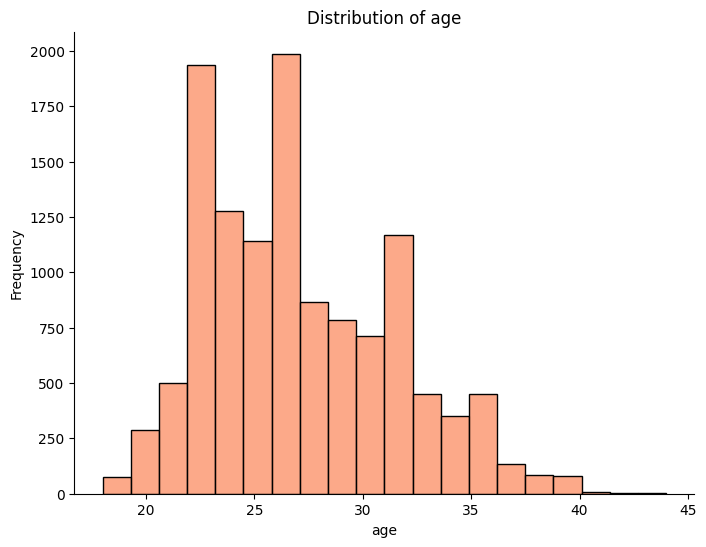

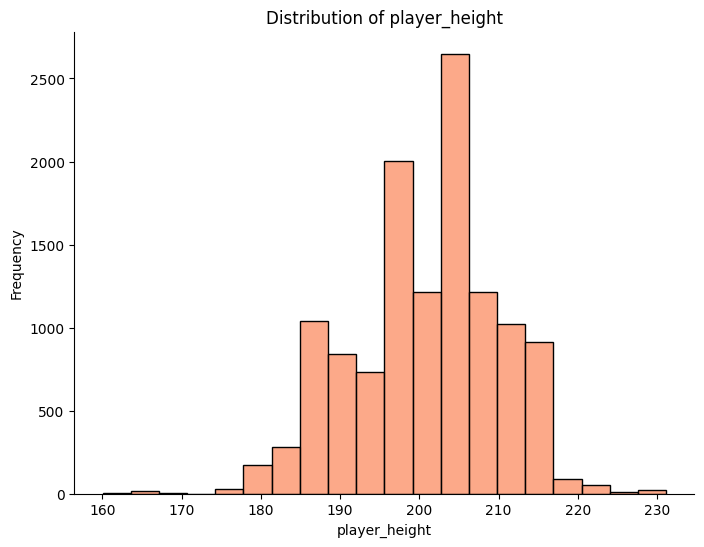

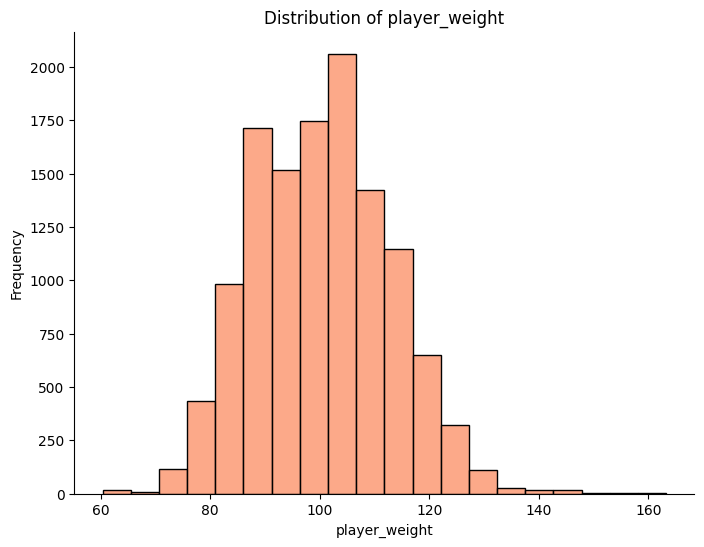

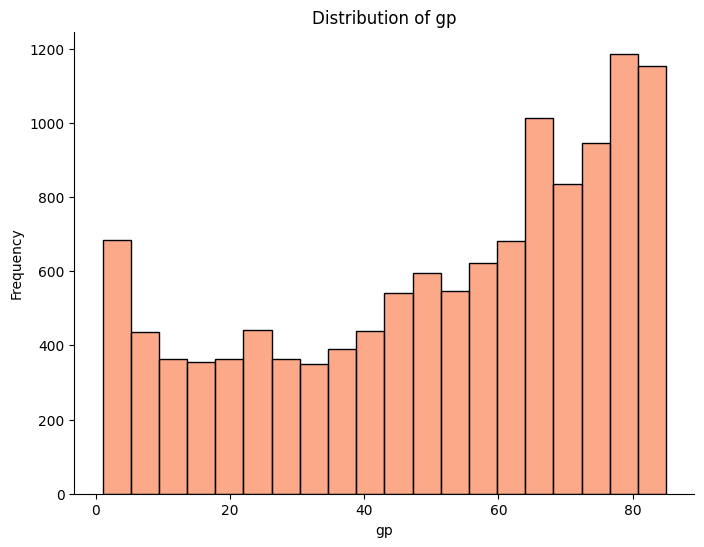

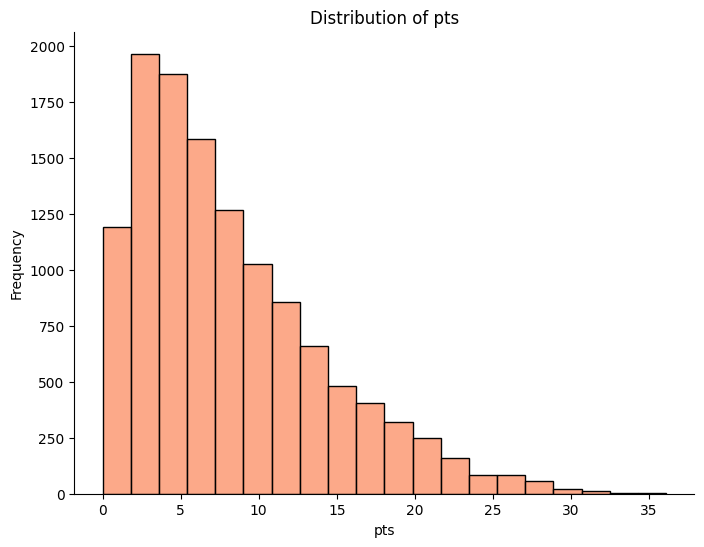

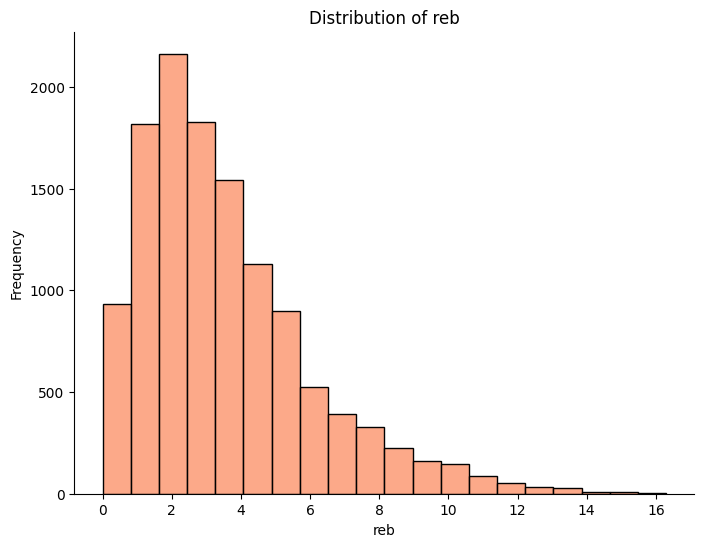

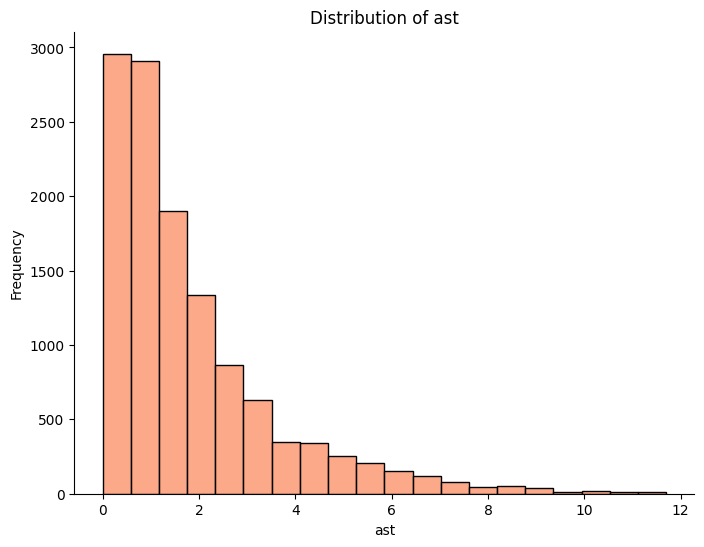

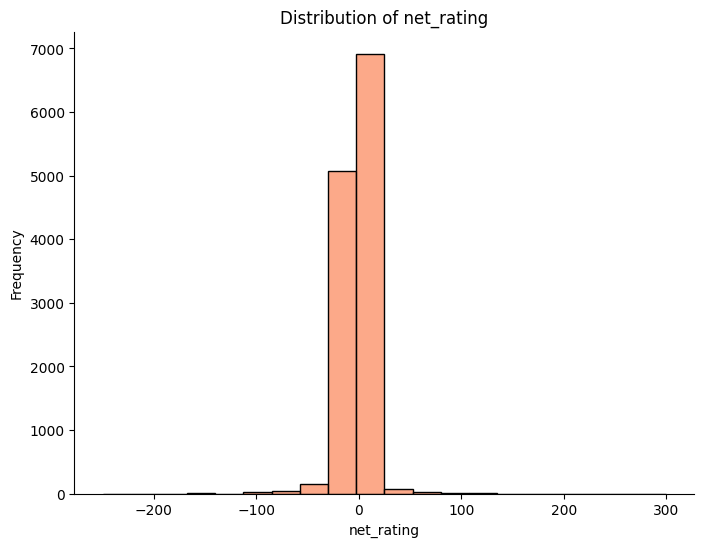

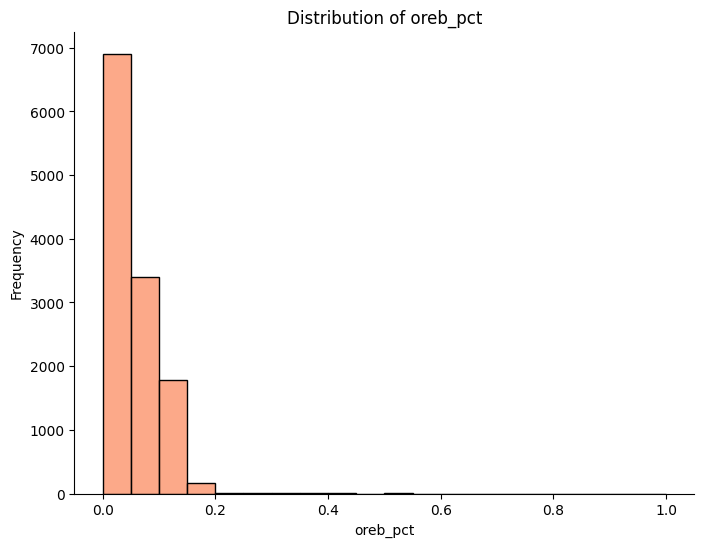

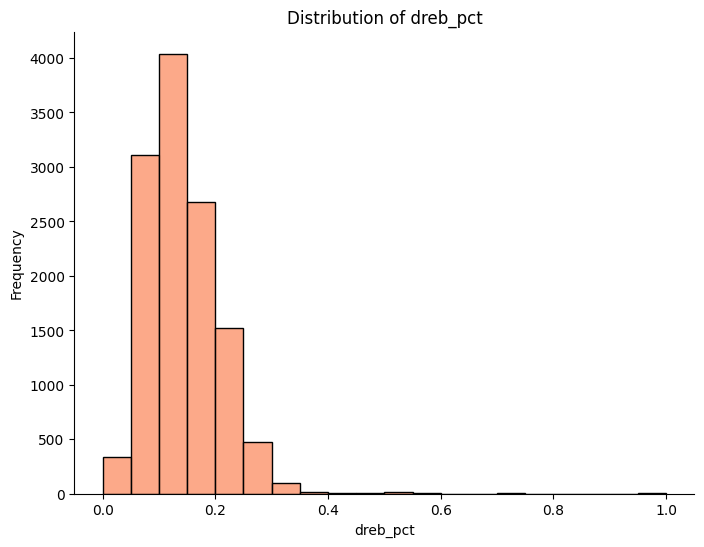

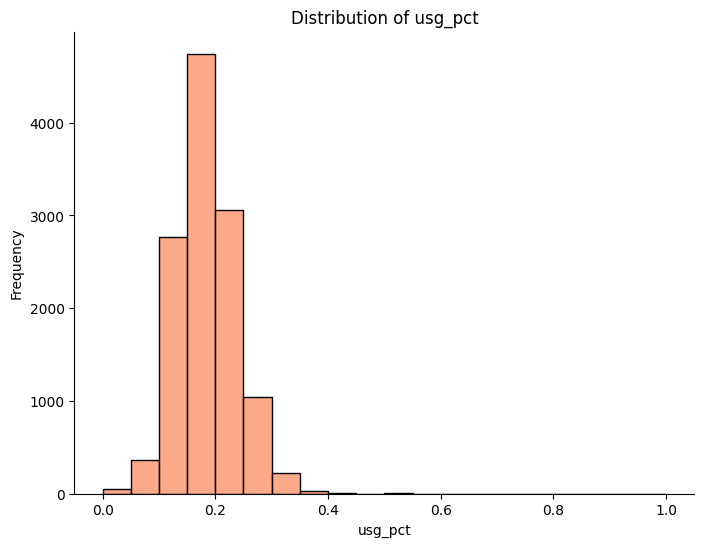

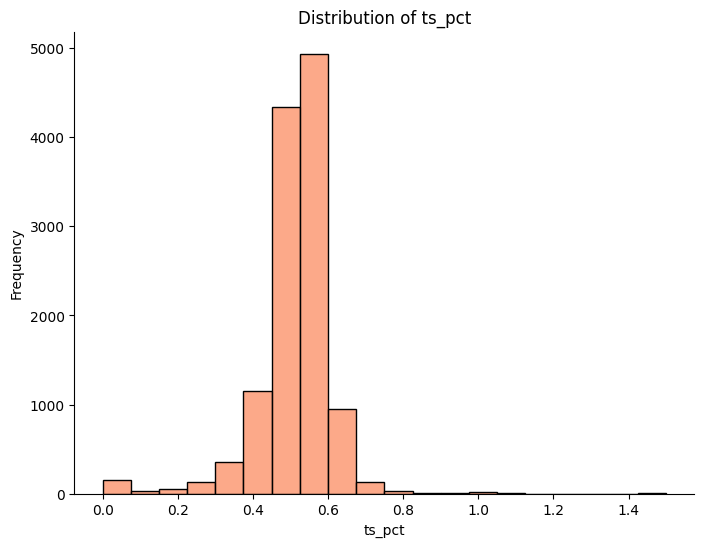

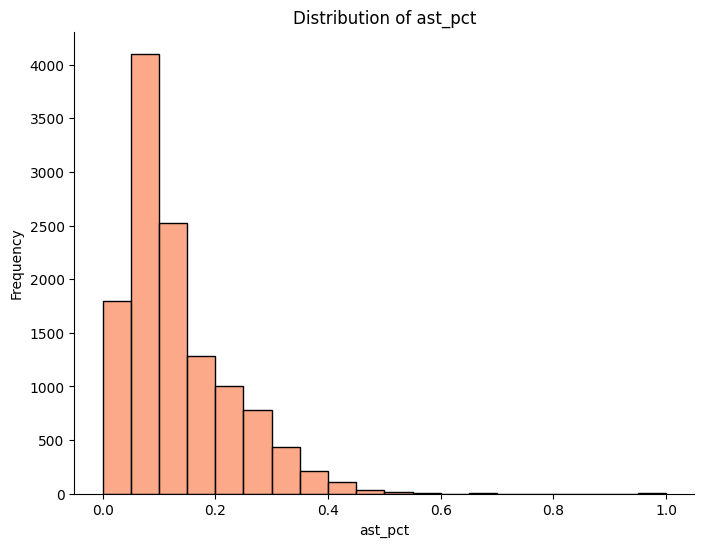

In [15]:
plot_histograms(df)

Then I wanted to look at some categorical variables and gain insights, here I look at players by country and players by college.

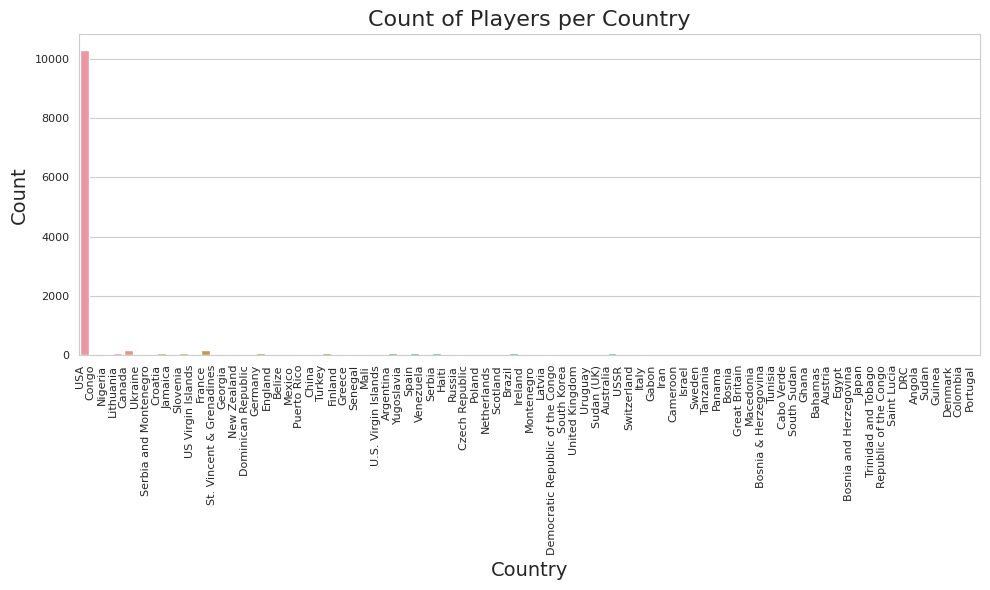

In [16]:
#Dropping any rows that have Na in country or college
df_filtered = df.dropna(subset=["country", "college"])

#Grouping players by country and their name
unique_players_country = df_filtered.groupby("country")["player_name"].nunique().reset_index()

# Plot count of players per country
plt.figure(figsize=(10, 6))

#Adjusting plot features
sns.set_style("whitegrid")
sns.set_palette("husl") # Choose a nice color palette
ax = sns.countplot(x="country", data=df_filtered)
ax.set_title("Count of Players per Country", fontsize=16)
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show() 

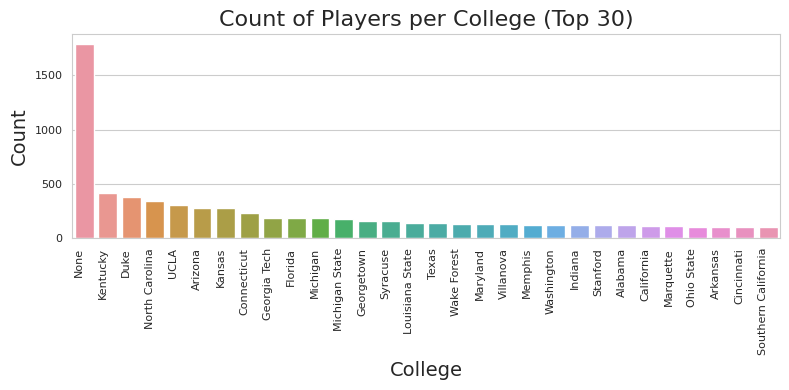

In [17]:
#Grouping dataframe by college and player name
unique_players_college = df_filtered.groupby("college")["player_name"].nunique().reset_index()

#Adjusting plot size
plt.figure(figsize=(8, 4))

#Adjusting plot features
sns.set_style("whitegrid")
sns.set_palette("husl") # Choose a nice color palette
ax = sns.countplot(x="college", data=df_filtered, order=df_filtered["college"].value_counts().index[:30]) # Show only top 20 colleges
ax.set_title("Count of Players per College (Top 30)", fontsize=16)
ax.set_xlabel("College", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

I wanted to see how many players were drafted versus undrafted:

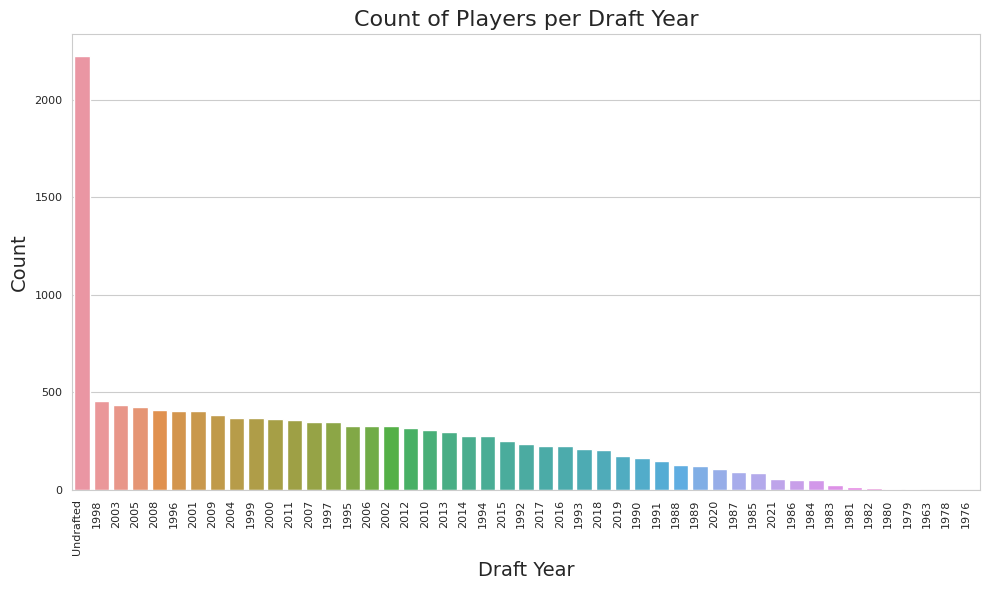

In [18]:
#Grouping by draft_year and getting unique player_name by each group, then resetting index so draft_year stays a column
unique_players_draft_year = df_filtered.groupby("draft_year")["player_name"].nunique().reset_index()

#plotting
plt.figure(figsize=(10, 6))

#Adjusting plot features
sns.set_style("whitegrid")
sns.set_palette("husl") # Choose a nice color palette
ax = sns.countplot(x="draft_year", data=df_filtered, order=df_filtered["draft_year"].value_counts().index[:50]) 
ax.set_title("Count of Players per Draft Year", fontsize=16)
ax.set_xlabel("Draft Year", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Then I wanted to look at trends in player performance by season.

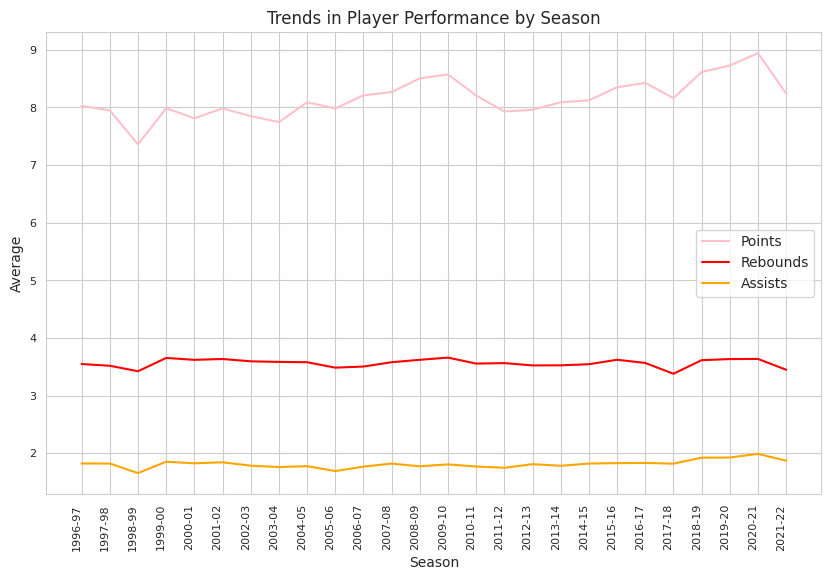

In [19]:
#Getting aggregate stats by grouping by season and finding the mean of stats below per season
agg_stats = df.groupby('season')[['pts', 'reb', 'ast']].mean()

#Creating line charts to visualize trends in player performance across seasons
fig, ax = plt.subplots(figsize=(10, 6))

#Plotting points
sns.lineplot(data=agg_stats, x=agg_stats.index, y='pts', label='Points', color = 'pink')

#Plotting Rebounds
sns.lineplot(data=agg_stats, x=agg_stats.index, y='reb', label='Rebounds', color = 'red')

#Plotting Assists
sns.lineplot(data=agg_stats, x=agg_stats.index, y='ast', label='Assists', color = 'orange')

#Adjusting plot features
ax.set_title('Trends in Player Performance by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Average')
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.show()

I wanted to take a quick look at one of my favorite players performance over the years

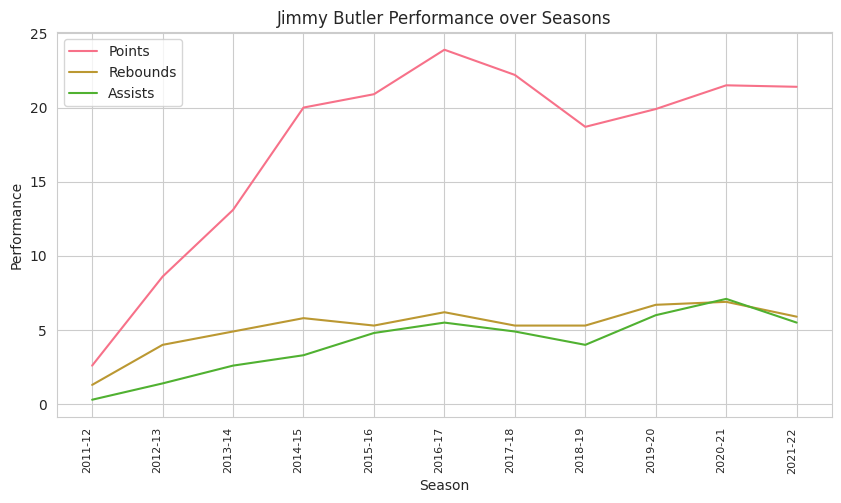

7052     2011-12
7617     2012-13
7950     2013-14
8133     2014-15
8913     2015-16
9442     2016-17
9746     2017-18
10553    2018-19
11083    2019-20
11238    2020-21
11803    2021-22
Name: season, dtype: object

In [46]:
#Picking the player
player_name = "Jimmy Butler"

#Filtering the data for the selected player
player_data = df[df["player_name"] == player_name]

# Creating a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting points
ax.plot(player_data["season"], player_data["pts"], label="Points")

# Plotting rebounds
ax.plot(player_data["season"], player_data["reb"], label="Rebounds")

# Plotting assists
ax.plot(player_data["season"], player_data["ast"], label="Assists")
#Adjusting plot features
ax.set_xlabel("Season")
ax.set_ylabel("Performance")
ax.set_title(f"{player_name} Performance over Seasons")
ax.legend()
plt.xticks(rotation=90, ha="right", fontsize=8)

plt.show()

The code below separates the NBA teams by 2 so there's less clutter in the graphs. These graphs unfortunately do not tell us a lot about our data but I wanted to plot them anyway just to take a peak.

<ipython-input-21-455b3c0e3a33>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_stats = df.groupby(["team_abbreviation", "season"]).mean()


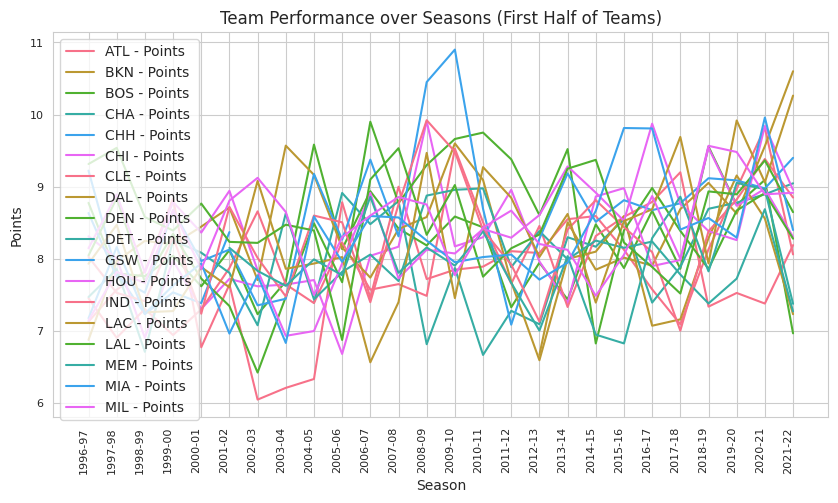

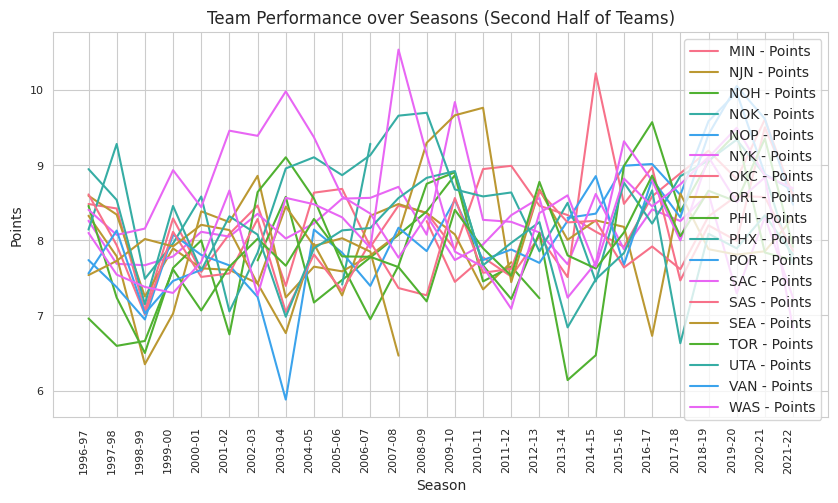

In [21]:
#Grouping the data by "team" and "season" and calculating the mean of numerical columns
agg_stats = df.groupby(["team_abbreviation", "season"]).mean()

#Getting unique team names
teams = df["team_abbreviation"].unique()

#Sorting teams alphabetically
teams.sort()

#Dividing teams into two halves because there are so many teams one graph would look ugly
num_teams = len(teams)
teams_first_half = teams[:num_teams // 2]
teams_second_half = teams[num_teams // 2:]

#Defining the figure and axes for the first half of teams
fig, ax1 = plt.subplots(figsize=(10, 5))

#Looping through first half of teams and create line charts
for team in teams_first_half:
    ax1.plot(agg_stats.loc[team]["pts"].index, agg_stats.loc[team]["pts"].values, label=f"{team} - Points")

#Setting plot title and axis labels for the first half of teams
ax1.set_title("Team Performance over Seasons (First Half of Teams)")
ax1.set_xlabel("Season")
ax1.set_ylabel("Points")
ax1.legend()
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)

#Defining the figure and axes for the second half of teams
fig, ax2 = plt.subplots(figsize=(10, 5))

#Looping through second half of teams and creating line charts
for team in teams_second_half:
    ax2.plot(agg_stats.loc[team]["pts"].index, agg_stats.loc[team]["pts"].values, label=f"{team} - Points")

#Setting plot title and axis labels for the second half of teams
ax2.set_title("Team Performance over Seasons (Second Half of Teams)")
ax2.set_xlabel("Season")
ax2.set_ylabel("Points")
ax2.legend()
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)

#Show the plot
plt.show()

Now moving on, I wanted to take a look at some linear relationships between variables of interest. Want to see if there is any visible/notable correlation between any of the variables.

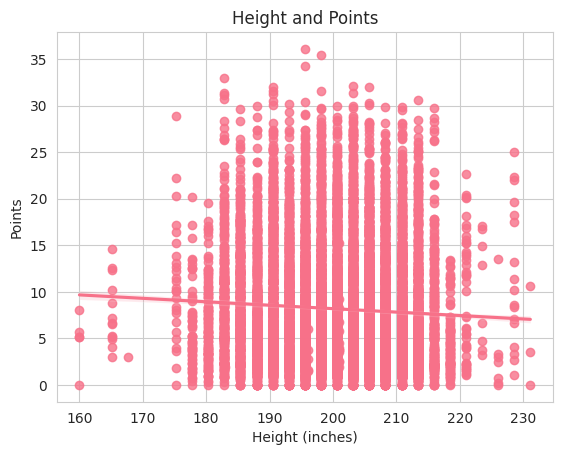

In [22]:
#Creating regression plot
sns.regplot(x="player_height", y="pts", data=df)
#Setting plot labels and title
plt.xlabel("Height (inches)")
plt.ylabel("Points")
plt.title("Height and Points")

# Show the plot
plt.show()

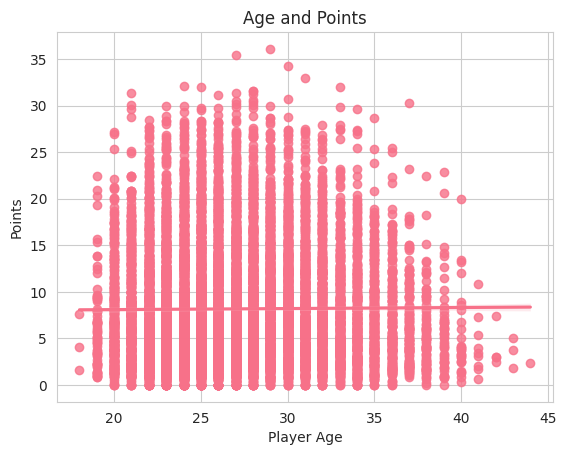

In [23]:
#Creating regression plot
sns.regplot(x="age", y="pts", data=df)
#Setting plot labels and title
plt.xlabel("Player Age")
plt.ylabel("Points")
plt.title("Age and Points")

# Show the plot
plt.show()

In [24]:
#Replacing undrafted with the number 61.
df['draft_number'].replace('Undrafted','61',inplace=True)
#Making the column numeric
df['draft_number'] = pd.to_numeric(df['draft_number'])
df['draft_number']

0        27
1        24
2        58
3         9
4        10
         ..
12300    13
12301     1
12302     6
12303    61
12304    61
Name: draft_number, Length: 12305, dtype: int64

In [25]:
#Deleting draft_numbers after 61 and deleting instances of 0 since we don't know if 0 represents undrafted or missing information.
df = df[ (df['draft_number'] <= 61) & (df['draft_number'] != 0)]
#Checking work
df['draft_number'].unique()

array([27, 24, 58,  9, 10, 29, 61, 37, 38, 25, 13, 17, 18, 21, 15, 43, 14,
       23, 40,  4, 11, 47, 33,  1,  8,  3, 19, 52, 42, 39,  6, 45, 30, 20,
       48,  5,  2, 41, 46, 34, 12,  7, 22, 57, 26, 35, 28, 49, 16, 32, 53,
       36, 44, 56, 51, 54, 31, 50, 55, 60, 59])

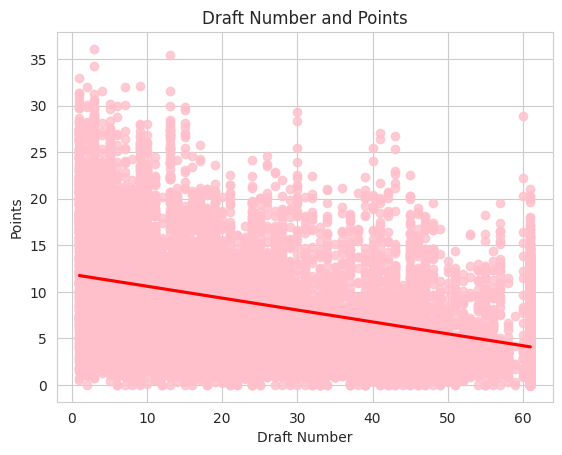

In [26]:
#Creating regression plot
sns.regplot(x="draft_number", y="pts", data=df, scatter_kws={"color": "pink"}, line_kws={"color": "red"})
#Setting plot labels and title
plt.xlabel("Draft Number")
plt.ylabel("Points")
plt.title("Draft Number and Points")

#Show the plot
plt.show()

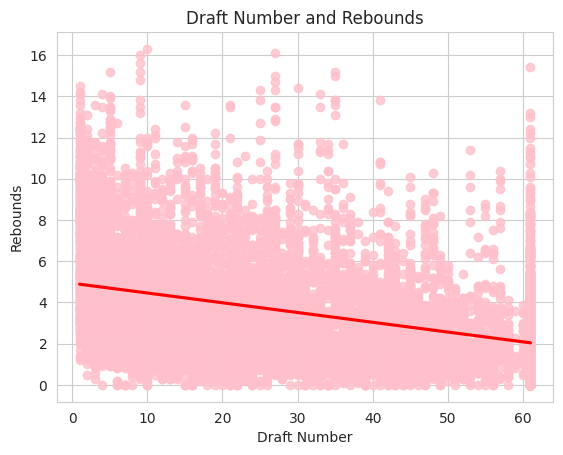

In [27]:
#Creating regression plot
sns.regplot(x="draft_number", y="reb", data=df, scatter_kws={"color": "pink"}, line_kws={"color": "red"})
#Setting plot labels and title
plt.xlabel("Draft Number")
plt.ylabel("Rebounds")
plt.title("Draft Number and Rebounds")

#Show the plot
plt.show()

Because of the large quantities of data, this doesn't really show us a clear picture. So, this time we group the data by draft_number and then find the aggregate statistics to see a clearer picture. We are creating separate groups for each draft number and then finding the mean number of stats per draft number.

In [28]:
#Making a list now to make it easier
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
#Grouping by draft_number and using the list to find the mean of the stat list we just made 
avg_by_pick = df.groupby(['draft_number'])[stats].mean().reset_index()
#Grouping by players and draft_number and finding the mean of the stat list 
avg_by_player = df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

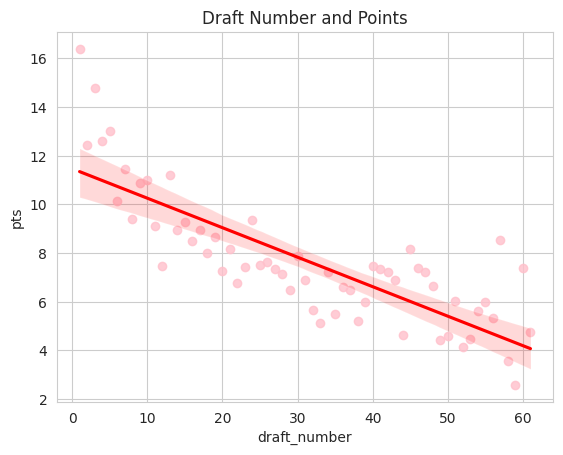

In [29]:
#Plotting newly aggregated data
sns.regplot(x='draft_number',y='pts',data=avg_by_pick, scatter_kws={"color": "pink"}, line_kws={"color": "red"})
plt.title("Draft Number and Points")
plt.show()

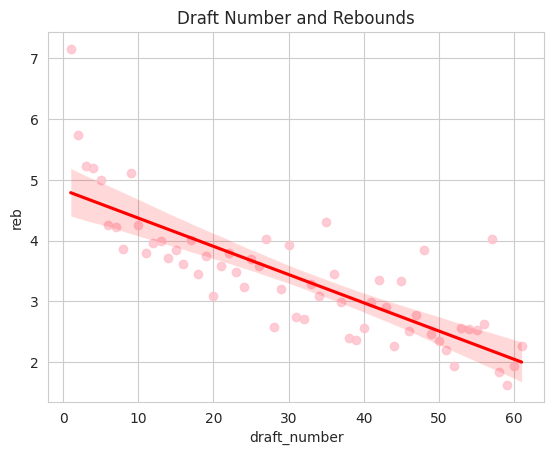

In [30]:
#plotting newly aggregated data
sns.regplot(x='draft_number',y='reb',data=avg_by_pick, scatter_kws={"color": "pink"}, line_kws={"color": "red"})
plt.title("Draft Number and Rebounds")
plt.show()

There seems to be a negative correlation between points and draft number, and rebounds and draft number.

Now we want to fix the draft round column, we replace any instances of Nan, Undrafted, or the string "0" to the number 0. Then we cast the variable as an integer for the next steps. 

In [31]:
#Cleaning draft_round column in case I want to use it in the future

# Replacing "0" with "Nan"
df['draft_round'] = np.where(df['draft_round'] == "0", "Nan", df['draft_round'])

# Replacing "Undrafted" with "Nan"
df['draft_round'] = np.where(df['draft_round'] == "Undrafted", "Nan", df['draft_round'])

# Converting "Nan" to 0
df['draft_round'] = np.where(df['draft_round'] == "Nan", 0, df['draft_round'])

# Converting 'draft_round' to integer data type
df['draft_round'] = df['draft_round'].astype(int)

# Filtering rows where 'draft_round' is less than or equal to 2
df = df[df['draft_round'] <= 2]

#Looking at unique values post cleaning
df['draft_round'].unique()

array([2, 1, 0])

 To look at the correlation between all numeric values, I look at correlation and then create a heatmap.

In [32]:
#Checking out correlation
df.corr()

<ipython-input-32-3cbb7c0329a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.009794,0.058232,-0.021854,-0.050925,0.057860,0.011921,0.037969,0.092756,0.093090,-0.059983,0.019653,-0.115240,0.027849,0.068701
player_height,-0.009794,1.000000,0.825448,0.084724,-0.181566,0.001742,-0.056280,0.424009,-0.449558,-0.002959,0.589571,0.615385,-0.103196,0.073479,-0.614170
player_weight,0.058232,0.825448,1.000000,0.085900,-0.166423,0.018523,-0.027068,0.437656,-0.380423,0.004040,0.601370,0.607244,-0.065824,0.069188,-0.529581
draft_round,-0.021854,0.084724,0.085900,1.000000,-0.219373,0.104549,0.047028,0.050711,0.010355,0.006282,0.036634,0.028033,0.025479,0.053422,-0.023260
draft_number,-0.050925,-0.181566,-0.166423,-0.219373,1.000000,-0.334530,-0.441769,-0.395567,-0.268790,-0.097392,-0.042124,-0.158841,-0.269445,-0.154338,-0.077251
gp,0.057860,0.001742,0.018523,0.104549,-0.334530,1.000000,0.538703,0.469982,0.385316,0.252741,-0.015137,0.065814,0.146979,0.375129,0.134420
pts,0.011921,-0.056280,-0.027068,0.047028,-0.441769,0.538703,1.000000,0.624674,0.660510,0.218259,-0.122421,0.054215,0.639245,0.375679,0.332546
reb,0.037969,0.424009,0.437656,0.050711,-0.395567,0.469982,0.624674,1.000000,0.239467,0.190565,0.409698,0.612097,0.231190,0.314285,-0.070454
ast,0.092756,-0.449558,-0.380423,0.010355,-0.268790,0.385316,0.660510,0.239467,1.000000,0.164916,-0.340216,-0.199326,0.392885,0.174809,0.802929
net_rating,0.093090,-0.002959,0.004040,0.006282,-0.097392,0.252741,0.218259,0.190565,0.164916,1.000000,0.060934,0.049973,0.018350,0.315419,0.066038


Visualizing it in a heat map:

<ipython-input-33-648c0bbded9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="PiYG")


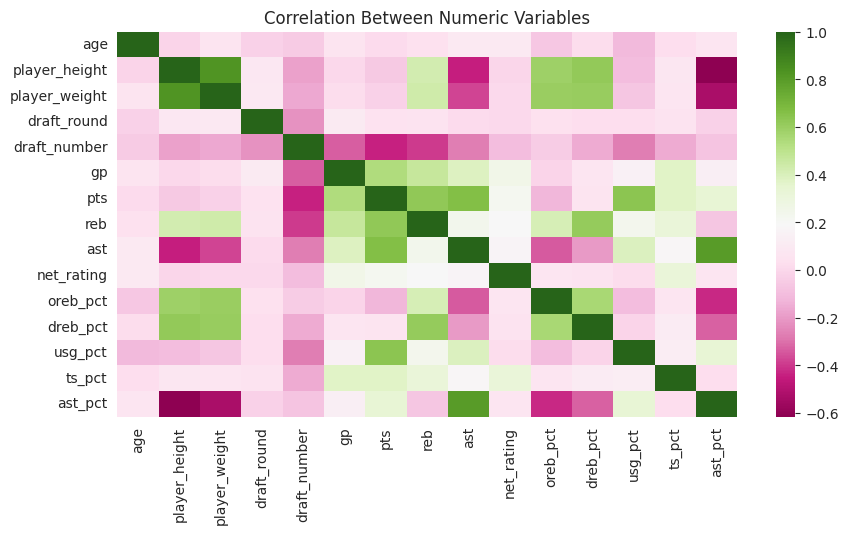

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
#Making heatmap
sns.heatmap(df.corr(), cmap="PiYG") 
ax.set_title('Correlation Between Numeric Variables')
plt.show()

There seems to be a negative correlation between draft_number and other stats.

Since I see a negative correlation between draft number and other stats, I want to see the average stat by draft number.

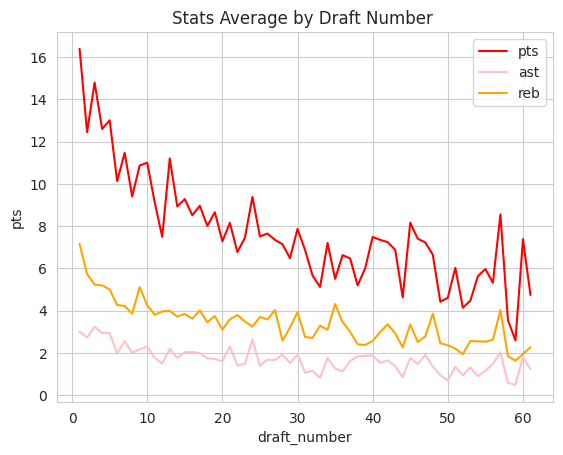

In [34]:
#Plotting pts by draft number
ax = sns.lineplot(x='draft_number',y='pts',data=avg_by_pick, label='pts', color = 'red').set(title = 'Stats Average by Draft Number ')
#Plotting rebounds by draft number
ax = sns.lineplot(x='draft_number',y='ast',data=avg_by_pick, label='ast', color = 'pink')
#Plotting assists by draft number
ax = sns.lineplot(x='draft_number',y='reb',data=avg_by_pick, label='reb', color = 'orange')
ax.legend()
plt.show()

Here we can see that the lower the draft number the higher the stats. Although it is commonly assumed that the lower number of draft pick indicates a better player, there are many cases where number one picks underperform or higher picks overperform. But this allows us to see that even though there are cases as aforementioned, there is a trend.

As of now, I am choosing to focus on draft number because I can explore supervised machine learning using draft number as a label, and the rest of the stats to predict that draft number. Ideally, given more time, I would explore unsupervised machine learning models using the data to gain insights we dont know already. 

#Machine learning models

First gonna try to use aggregate statistics of each player, so their age, team, and season doesnt matter, college and country could get one hot encoded but would make the data set extremely large and hard to work on. So for starters going to begin with numeric data that we have aggregated per player.

In [35]:
#Creating a new dataframe and grouping by player name, then finding the mean if the variables are numerical or showing the first value
#of the first row will be selected as the aggregated value
temp = df.groupby('player_name').agg({k: 'mean' if v in ('int64', 'float64') else 'first'
                          for k,v in df.dtypes[1:].items()})
#Dropping object variables and datetime variables
temp.drop(temp.select_dtypes(["O", "datetime"]).columns, axis = "columns", inplace = True)

#The above code makes age and draft_round into numerical variables, but because we grouped and aggregated stats, 
#their age would not matter and the draft_round variable is ordinal 
columns_to_drop = ['age', 'draft_round']

#Dropping the columns 
temp.drop(columns_to_drop, axis=1, inplace=True)

#Checking out the outcome
temp.head()
temp.dtypes


player_height    float64
player_weight    float64
draft_number     float64
gp               float64
pts              float64
reb              float64
ast              float64
net_rating       float64
oreb_pct         float64
dreb_pct         float64
usg_pct          float64
ts_pct           float64
ast_pct          float64
dtype: object

Now we will try to implement machine learning models. Our variables are continuous, and usually when dealing with classification tasks, ML models deal with discrete and categorical data. Since the nature of our data is different, we deal with it differently. A way I tried to tackle this is by turning the draft number into a continuous variable, then using regression to predict this continuous variable. Then I turn the continuous predictions into a discrete variable by rounding the numbers and then turning them into integers. Once this is complete, I try to run some ML algorithms. I run Decision Trees, Random Forests, and Gradient Booster. I also use cross validatation to see how well my models perform. 




##Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

#Assigning X and y
y = temp['draft_number']
X = temp

#Scaling the data
sscaler = StandardScaler()
x = sscaler.fit_transform(X)

#Splitting the data into testing and training sets, making the test size 30% of the data
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training a regression model to predict continuous draft number
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_continuous = regressor.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred_continuous)
print("Mean Squared Error (MSE):", mse)

# Calculating RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred_continuous)
print("Mean Absolute Error (MAE):", mae)

# Calculating R2 score
r2 = r2_score(y_test, y_pred_continuous)
print("R2 Score:", r2)


Mean Squared Error (MSE): 6.567066255797624e-28
Root Mean Squared Error (RMSE): 2.5626287783831712e-14
Mean Absolute Error (MAE): 2.0187580574916694e-14
R2 Score: 1.0


In [38]:
# Converting continuous draft number predictions and train and test set into discrete and ordinal draft classes
y_pred_discrete = np.round(y_pred_continuous).astype(int) # Round the predicted values to the nearest integer
y_train_discrete = pd.Series(y_train).astype(int)
y_test_discrete = pd.Series(y_test).astype(int)

##Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Training a classification model to predict draft classes based on other features
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train_discrete)

# Predicting draft classes using the classification model
y_pred_classification = dt_classifier.predict(X_test)

# Evaluating the performance of the classification model
classification_accuracy = accuracy_score(y_test_discrete, y_pred_classification)

# Evaluating the performance of the combined regression and classification approach
combined_accuracy = accuracy_score(y_test_discrete, y_pred_discrete)

#Evaluating the performance of the classification model using f1 metric
f1 = f1_score(y_test_discrete, y_pred_classification, average = 'weighted')

print(combined_accuracy)
print("Classification f1 score: f1", f1)

0.9986357435197817
Classification f1 score: f1 1.0


In [40]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_classifier, X_train, y_train_discrete, cv=5)

# Printing the accuracy for each fold
print("Cross-validation accuracy scores: ", cv_scores)

# Calculating and printing the mean and standard deviation of the accuracy scores
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

Cross-validation accuracy scores:  [0.99415205 0.99707602 1.         1.         1.        ]
Mean accuracy:  0.9982456140350877
Standard deviation:  0.002339181286549724


##Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier


# Creating a Random Forest Classifier 
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight = 'balanced')  # You can adjust the number of estimators (trees) as needed

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_discrete)

# Predicting draft classes using the trained classifier
y_pred_classification = rf_classifier.predict(X_test)

# Evaluating the performance of the classifier
classification_accuracy = accuracy_score(y_test_discrete, y_pred_classification)

#Evaluating the performance of the classification model using f1 metric
f1 = f1_score(y_test_discrete, y_pred_classification, average = 'weighted')

# Printing the accuracy and f1 score
print("Classification Accuracy: ", classification_accuracy)
print("Classification f1 score: f1", f1)

Classification Accuracy:  0.669849931787176
Classification f1 score: f1 0.6371321462382064


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_train, y_train_discrete, cv=5)

# Printing the accuracy for each fold
print("Cross-validation accuracy scores: ", cv_scores)

# Calculating and print the mean and standard deviation of the accuracy scores
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())

KeyboardInterrupt: ignored

I find it pretty interesting that with decision trees the accuracy scores higher than with random forests, since random forests aim to improve prediction accuracy and prevent overfitting. I think decision trees might be overfitting the model. This may indicate that the data has some level of noise that is not well captured by a single decision tree. It could also be that the data classes are imbalanced, I have noisy features, or I have suboptimal hyperparameters. I try to run gridsearch below to see what can help with my hyperparameters, as well as implementing the built in method random forests has for imbalanced data. 

In [45]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a random forest classifier
rf_classifier = RandomForestClassifier(class_weight = 'balanced')

# Instantiating the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train_discrete)

# Printing the best hyperparameter values
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Creating a Gradient Boosting Classifier with desired hyperparameters
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=40)

# Training the model on the training data
gb_classifier.fit(X_train, y_train_discrete)

# Predicting draft classes on the test data
y_pred_classification = gb_classifier.predict(X_test)

# Calculating accuracy of the model
classification_accuracy = accuracy_score(y_test_discrete, y_pred_classification)

#Evaluating the performance of the classification model using f1 metric
f1 = f1_score(y_test_discrete, y_pred_classification, average = 'weighted')

# Printing the accuracy and f1 score
print("Classification Accuracy: ", classification_accuracy)
print("Classification f1 score: f1", f1)

#Conclusions and Future Studies